# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from preprocessing import *

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# Preprocessing

In [3]:
(
    articles,
    categories,
    links,
    paths_finished,
    paths_unfinished,
) = import_and_clean_data()

# Cliches visualization

### Cliches preprocessing

In [4]:
from cliches import *

In [5]:
# define key_word for analysis: 
key_word = "United_Kingdom"

# only keep rows such that key_word in path
around_key_word = get_df_keyword(paths_finished, key_word=key_word).copy(deep=True)

# get category of the key_word
around_key_word["keyword_category"] = around_key_word["path"].apply(lambda path: get_category_keyword(key_word, path, categories))

# article juste before/just after key_word
# TODO: function to be improved/discussed. What do we want to do with "<"?
around_key_word["around_path"] = around_key_word["path"].apply(
    lambda path: get_index_keyword_in(key_word, path)
)

# update initial/target_article, initial/target_category
around_key_word["around_IA"] = around_key_word["around_path"].apply(
    lambda path: path[0]
)
around_key_word["around_TA"] = around_key_word["around_path"].apply(
    lambda path: path[-1]
)
around_key_word["around_IC"] = around_key_word["around_IA"].apply(
    lambda article: categories[categories["article"] == article]["category1"].values
)
around_key_word["around_TC"] = around_key_word["around_TA"].apply(
    lambda article: categories[categories["article"] == article]["category1"].values
)

around_key_word

,hashedIpAddress,timestamp,durationInSec,path,rating,path_length,shortest_path,diff_length,keyword_category,around_path,around_IA,around_TA,around_IC,around_TC
74,565e6dc60eeca66c,1253358736,77,"[Aberdeen, City_status_in_the_United_Kingdom, ...",0.0,5,3,2,[Geography],"[Aberdeen, City_status_in_the_United_Kingdom, ...",Aberdeen,Market,[Geography],[Business_Studies]
113,4dc8af51482ebb5a,1336876538,221,"[Achilles, Ethiopia, United_Kingdom, World_War...",3.0,4,2,2,"[Countries, Geography, Geography]","[Ethiopia, United_Kingdom, World_War_II]",Ethiopia,World_War_II,"[Geography, Countries]",[History]
115,0adc390d00c8c538,1344743190,63,"[Achilles, Greek_mythology, Ancient_Greece, Eu...",3.0,6,2,4,"[Countries, Geography, Geography]","[Europe, United_Kingdom, Prime_Minister_of_the...",Europe,Prime_Minister_of_the_United_Kingdom,[Geography],[Citizenship]
117,31980f901eee5467,1346717015,117,"[Achilles, Ethiopia, United_Kingdom, World_War...",0.0,4,2,2,"[Countries, Geography, Geography]","[Ethiopia, United_Kingdom, World_War_II]",Ethiopia,World_War_II,"[Geography, Countries]",[History]
121,3a11233c52f824f8,1350896212,224,"[Achilles, William_Shakespeare, England, Great...",0.0,7,2,5,"[Countries, Geography, Geography]","[<, United_Kingdom, World_War_II]",<,World_War_II,[],[History]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51280,6f4978c43a8faffd,1358871308,164,"[Timken_1111, Chicago, Roman_Catholic_Church, ...",0.0,5,4,1,"[History, People]","[Industrial_Revolution, George_III_of_the_Unit...",Industrial_Revolution,British_monarchy,[History],[Citizenship]
51287,4e3201ac6a75f14f,1324457682,150,"[Tropical_Storm_Larry_(2003), Pacific_Ocean, U...",3.0,8,3,5,"[Countries, Geography, Geography]","[Pacific_Ocean, United_Kingdom, England]",Pacific_Ocean,England,[Geography],[Geography]
51299,3cc4f2837bf22048,1325177555,59,"[Union_Station_(San_Diego), World_War_II, Unit...",0.0,4,2,2,"[Countries, Geography, Geography]","[World_War_II, United_Kingdom, England]",World_War_II,England,[History],[Geography]
51301,3278e904185ec5bc,1361584612,168,"[Valparaíso, World_Heritage_Site, Europe, <, U...",0.0,10,3,7,"[Countries, Geography, Geography]","[<, United_Kingdom, United_Nations]",<,United_Nations,[],[Citizenship]


### Visualization of cliches articles

In [6]:
from plot_helpers import *

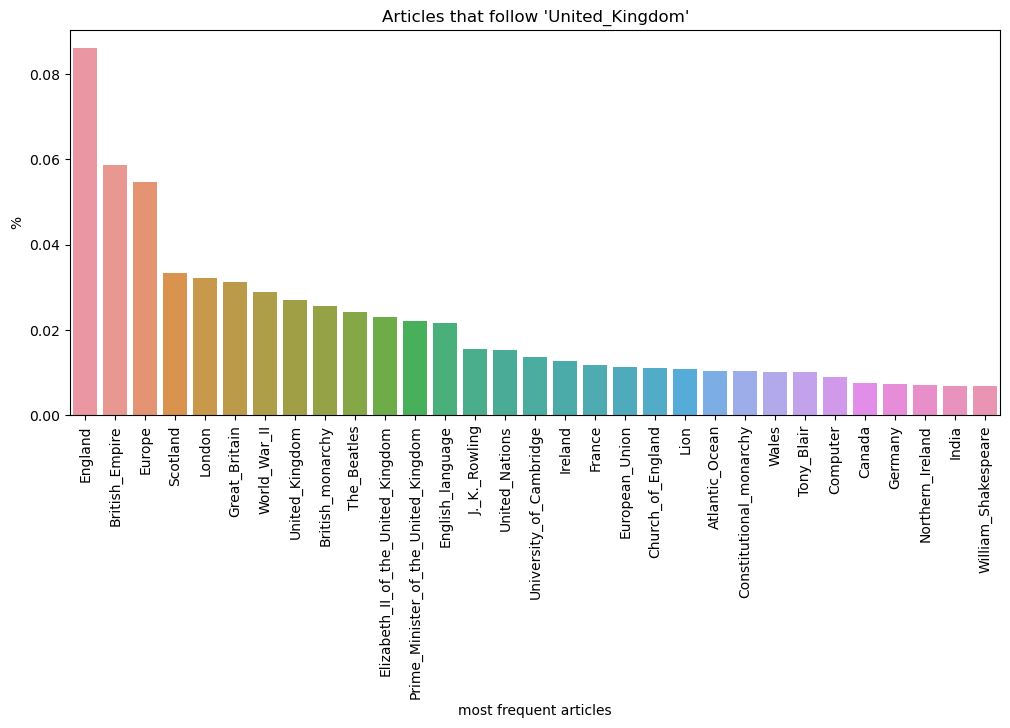

In [7]:
# keep only 10% most frequent articles just after key_word
most_frequent_after = around_key_word["around_TA"].value_counts(normalize=True)
plot_most_frequent_articles(most_frequent_after, "follow");

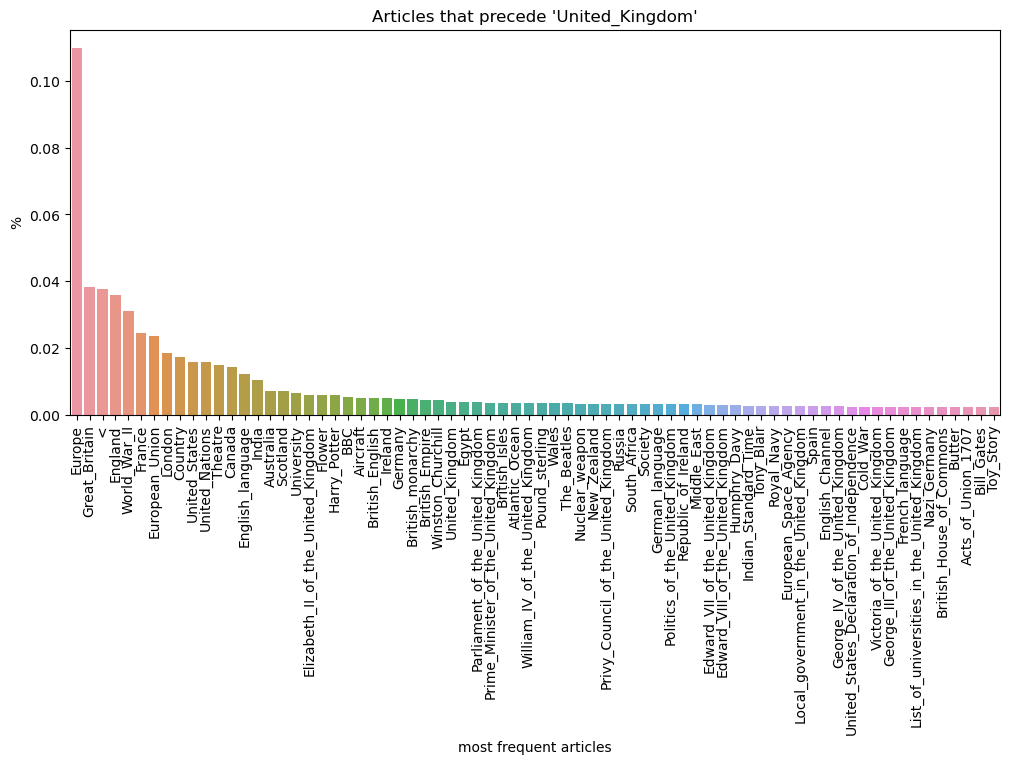

In [8]:
# keep only 10% most frequent articles just after key_word
most_frequent_before = around_key_word["around_IA"].value_counts(normalize=True)
plot_most_frequent_articles(most_frequent_before, "precede");